In [94]:
import pandas as pd
import sklearn
import torch
import numpy as np
import openpyxl
import matplotlib.pyplot as plt


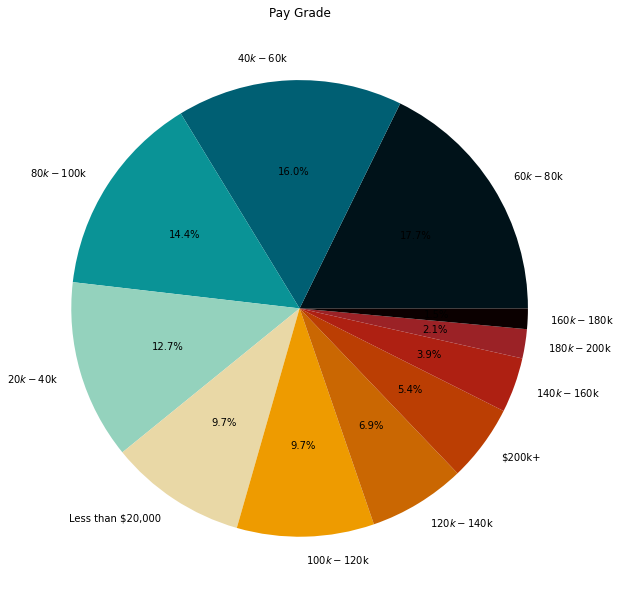

In [95]:
df = pd.read_csv("DataDraft1.csv")
#Create Pie chart of Pay Grade
df["PayAnnual"].value_counts()
fig1, ax1 = plt.subplots()
PayDf = df.PayAnnual.value_counts().rename_axis('Pay Ranges').reset_index(name='counts')
colors = ["#001219","#005f73","#0a9396","#94d2bd","#e9d8a6","#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226","#0b0000"]
ax1.pie(PayDf["counts"], labels=PayDf["Pay Ranges"],autopct='%1.1f%%',colors=colors)
ax1.set_title("Pay Grade")
fig1.set_size_inches(18.5, 10.5)
fig1.savefig('PieChartOfPayGrade.png', dpi=200)


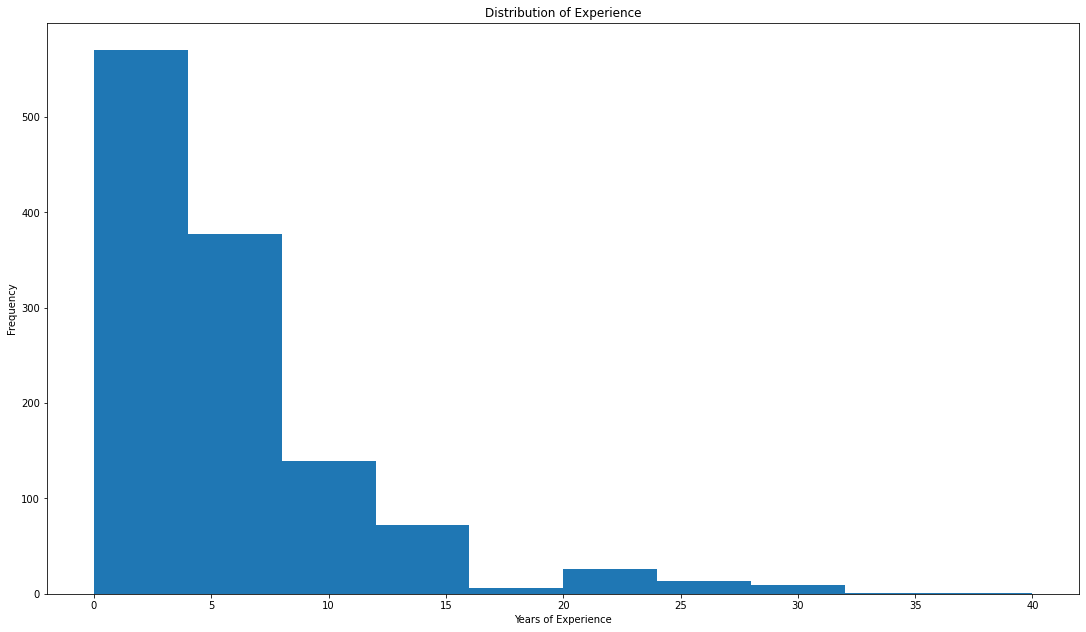

In [96]:
#Create Histogram of Years of experience
df["YearsDVExperience"].dropna()
fig2, ax2 =plt.subplots()
ax2.hist(df["YearsDVExperience"])
ax2.set_title("Distribution of Experience")
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Frequency")
fig2.set_size_inches(18.5, 10.5)
fig2.savefig('HistogramOfExperience.png', dpi=200)

In [97]:
#Years of experience vs Hourly Wage
df2 = pd.read_excel("2021SOTI_SurveyDataForPublic_COPY.xlsx", sheet_name="data_repub_2019",header=2)
df3 = df2[["PayHourly", "YearsDVExperience"]]
df3.dropna(how='any',inplace=True)

C:\Users\David\AppData\Local\Temp\ipykernel_12568\3190484587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(how='any',inplace=True)


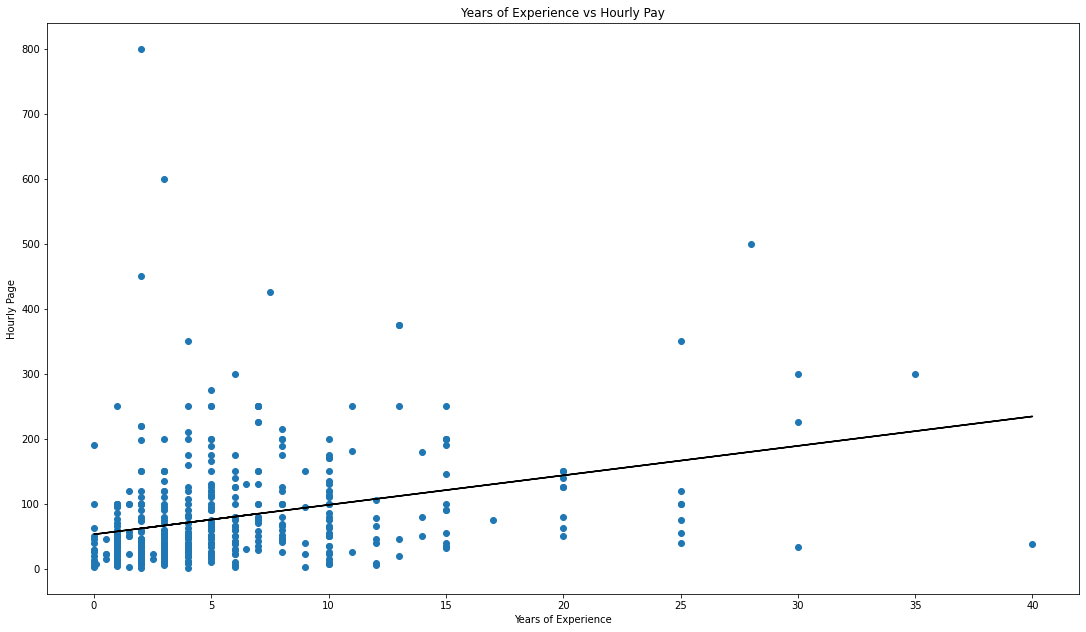

In [98]:
#Years of Experience vs Hourly Wage cont.
b, m= np.polynomial.polynomial.polyfit(df3["YearsDVExperience"], df3["PayHourly"],1)
fig3, ax3 =plt.subplots()
ax3.scatter(df3["YearsDVExperience"], df3["PayHourly"])
ax3.plot(df3["YearsDVExperience"], b+m*df3["YearsDVExperience"],'-',color='black')
ax3.set_title("Years of Experience vs Hourly Pay")
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Hourly Page")
fig3.set_size_inches(18.5, 10.5)
fig3.savefig('ExperienceVsHourlyPay.png', dpi=200)


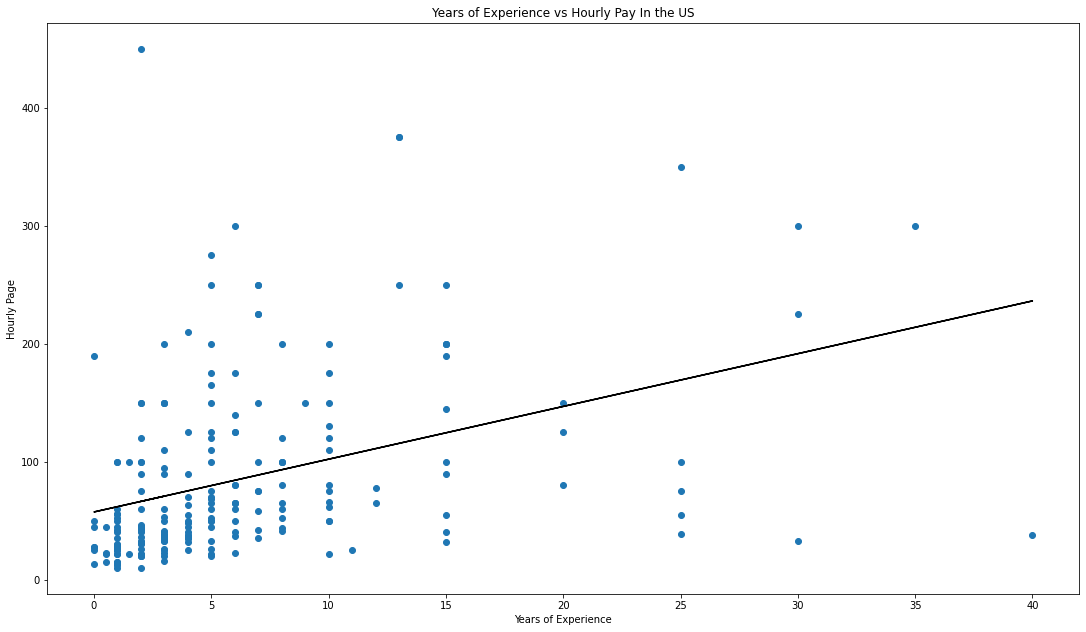

In [100]:
#Years of Experience vs Hourly Wage cont. Filtered for US
df4 = df2[["PayHourly", "YearsDVExperience","Loc1Country__cleaned"]]
df4 = df4[df4["Loc1Country__cleaned"]=="United States"]
df4.dropna(how='any',inplace=True)

b, m= np.polynomial.polynomial.polyfit(df4["YearsDVExperience"], df4["PayHourly"],1)
fig4, ax4 =plt.subplots()
ax4.scatter(df4["YearsDVExperience"], df4["PayHourly"])
ax4.plot(df4["YearsDVExperience"], b+m*df4["YearsDVExperience"],'-',color='black')
ax4.set_title("Years of Experience vs Hourly Pay In the US")
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Hourly Page")
fig4.set_size_inches(18.5, 10.5)
fig4.savefig('ExperienceVsHourlyPayUS.png', dpi=200)

In [ ]:
#Regression to Predict Pay Grade
